In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
from sklearn.decomposition import PCA

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/RECSData/recs2009_public_trimmed.csv")
layout = pd.read_csv("/content/drive/MyDrive/RECSData/public_layout.csv")
data

,Type of housing unit,"Heating degree days in 2009, base temperature 65F","Cooling degree days in 2009, base temperature 65F",Building America Climate Region (collapsed for public file),"AIA Climate Zone, based on average temperatures from 1981 - 2010","Housing unit is owned, rented, or occupied without payment of rent",Year housing unit was built,Number of bedrooms,Number of full bathrooms,Number of half bathrooms,...,"Total cost, in whole dollars, 2009","Total cost for water heating, in whole dollars, 2009","Cooling degree days in 2009, base temperature 80F",Weather & shielding factor for the housing unit,Annual value for latent heat infiltration from outside air into the housing unit,Annual average ground water temperature (F) for 2009,Dry bulb design temperature (F) expected to be exceeded 1% of the time,Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area,Housing unit classified as urban or rural by Census,International Energy Conservation Code (IECC) climate zone (collapsed for public file)
0,2,4742,1080,4,3,1,2004,4,1,2,...,1315,211,56,0.48,6,56,96,0.0,1.0,5.0
1,2,2662,199,5,4,2,1998,3,2,1,...,1293,287,26,0.61,0,64,73,0.0,1.0,4.0
2,5,6233,505,1,2,2,1965,1,1,0,...,1327,115,49,0.48,3,52,88,NaN,NaN,NaN
3,2,6034,672,1,2,1,1985,3,2,1,...,1398,179,0,0.55,4,55,87,0.0,1.0,7.0
4,3,5388,702,1,3,1,1983,2,1,1,...,1558,237,0,0.61,4,50,90,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,2,7671,332,1,1,1,1985,3,2,0,...,1541,253,39,0.59,0,48,84,0.0,1.0,9.0
12079,4,2085,2844,2,5,2,1980,-2,1,0,...,543,54,393,0.50,0,56,101,0.0,1.0,3.0
12080,2,7935,472,1,1,1,1993,4,3,1,...,2093,204,22,0.58,1,46,89,0.0,1.0,9.0
12081,2,5834,770,1,2,1,1930,3,1,0,...,1023,108,0,0.54,1,53,93,0.0,1.0,8.0


In [ ]:
data.isna().sum()

Type of housing unit                                                                      0
Heating degree days in 2009, base temperature 65F                                         0
Cooling degree days in 2009, base temperature 65F                                         0
Building America Climate Region (collapsed for public file)                               0
AIA Climate Zone, based on average temperatures from 1981 - 2010                          0
                                                                                         ..
Annual average ground water temperature (F) for 2009                                      0
Dry bulb design temperature (F) expected to be exceeded 1% of the time                    0
Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area     1
Housing unit classified as urban or rural by Census                                       1
International Energy Conservation Code (IECC) climate zone (collapsed for public

In [ ]:
data= data.drop(data.index[2]) #dropping the entry with null values
data

,Type of housing unit,"Heating degree days in 2009, base temperature 65F","Cooling degree days in 2009, base temperature 65F",Building America Climate Region (collapsed for public file),"AIA Climate Zone, based on average temperatures from 1981 - 2010","Housing unit is owned, rented, or occupied without payment of rent",Year housing unit was built,Number of bedrooms,Number of full bathrooms,Number of half bathrooms,...,"Total cost, in whole dollars, 2009","Total cost for water heating, in whole dollars, 2009","Cooling degree days in 2009, base temperature 80F",Weather & shielding factor for the housing unit,Annual value for latent heat infiltration from outside air into the housing unit,Annual average ground water temperature (F) for 2009,Dry bulb design temperature (F) expected to be exceeded 1% of the time,Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area,Housing unit classified as urban or rural by Census,International Energy Conservation Code (IECC) climate zone (collapsed for public file)
0,2,4742,1080,4,3,1,2004,4,1,2,...,1315,211,56,0.48,6,56,96,0.0,1.0,5.0
1,2,2662,199,5,4,2,1998,3,2,1,...,1293,287,26,0.61,0,64,73,0.0,1.0,4.0
3,2,6034,672,1,2,1,1985,3,2,1,...,1398,179,0,0.55,4,55,87,0.0,1.0,7.0
4,3,5388,702,1,3,1,1983,2,1,1,...,1558,237,0,0.61,4,50,90,0.0,1.0,7.0
5,2,8866,270,1,1,1,1920,3,1,0,...,1906,131,3,0.58,0,49,84,0.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,2,7671,332,1,1,1,1985,3,2,0,...,1541,253,39,0.59,0,48,84,0.0,1.0,9.0
12079,4,2085,2844,2,5,2,1980,-2,1,0,...,543,54,393,0.50,0,56,101,0.0,1.0,3.0
12080,2,7935,472,1,1,1,1993,4,3,1,...,2093,204,22,0.58,1,46,89,0.0,1.0,9.0
12081,2,5834,770,1,2,1,1930,3,1,0,...,1023,108,0,0.54,1,53,93,0.0,1.0,8.0


In [ ]:
TARGET= "Total Site Electricity usage, in kilowatt-hours, 2009"
data[TARGET]

0        18466
1         5148
3        10015
4         2869
5         6387
         ...  
12078     7647
12079     1813
12080     9834
12081     4800
12082     1764
Name: Total Site Electricity usage, in kilowatt-hours, 2009, Length: 12082, dtype: int64

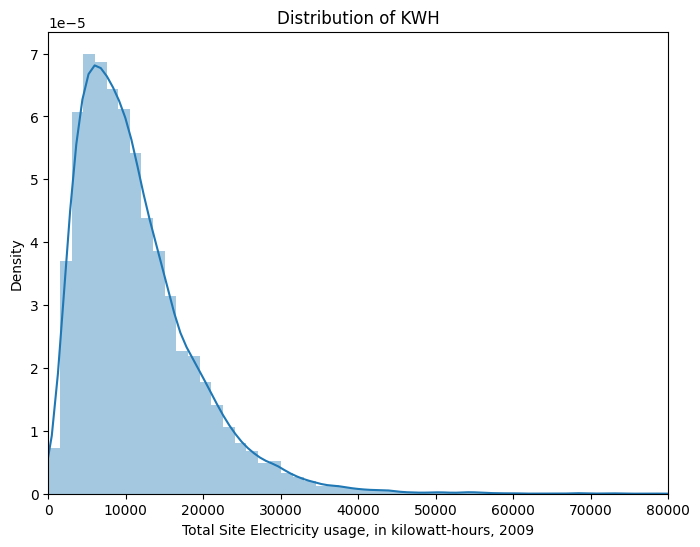

In [ ]:
fig, ax = plt.subplots(figsize=[8,6])
ax.set_xlim(0,80000)
sns.distplot(data[TARGET],ax=ax, bins=100).set_title('Distribution of KWH');

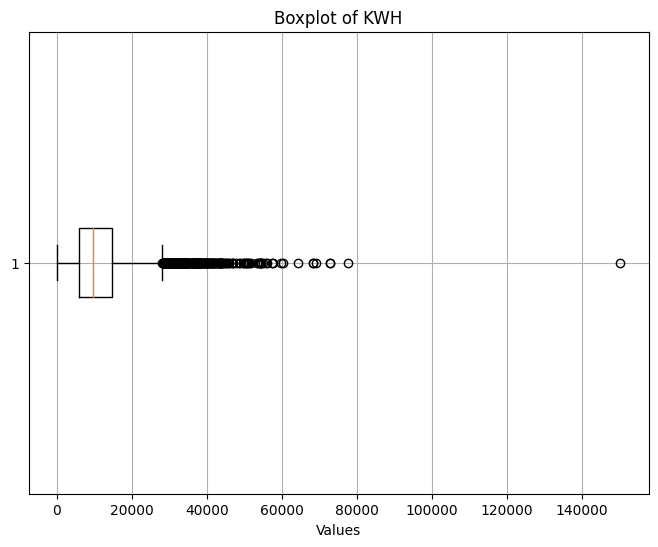

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data[TARGET], vert=False)
plt.title(f'Boxplot of KWH')
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [ ]:
  Q1 = data[TARGET].quantile(0.25)
  Q3 = data[TARGET].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data=data[(data[TARGET] >= lower_bound) & (data[TARGET] <= upper_bound)]
  data


,Type of housing unit,"Heating degree days in 2009, base temperature 65F","Cooling degree days in 2009, base temperature 65F",Building America Climate Region (collapsed for public file),"AIA Climate Zone, based on average temperatures from 1981 - 2010","Housing unit is owned, rented, or occupied without payment of rent",Year housing unit was built,Number of bedrooms,Number of full bathrooms,Number of half bathrooms,...,"Total cost, in whole dollars, 2009","Total cost for water heating, in whole dollars, 2009","Cooling degree days in 2009, base temperature 80F",Weather & shielding factor for the housing unit,Annual value for latent heat infiltration from outside air into the housing unit,Annual average ground water temperature (F) for 2009,Dry bulb design temperature (F) expected to be exceeded 1% of the time,Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area,Housing unit classified as urban or rural by Census,International Energy Conservation Code (IECC) climate zone (collapsed for public file)
0,2,4742,1080,4,3,1,2004,4,1,2,...,1315,211,56,0.48,6,56,96,0.0,1.0,5.0
1,2,2662,199,5,4,2,1998,3,2,1,...,1293,287,26,0.61,0,64,73,0.0,1.0,4.0
3,2,6034,672,1,2,1,1985,3,2,1,...,1398,179,0,0.55,4,55,87,0.0,1.0,7.0
4,3,5388,702,1,3,1,1983,2,1,1,...,1558,237,0,0.61,4,50,90,0.0,1.0,7.0
5,2,8866,270,1,1,1,1920,3,1,0,...,1906,131,3,0.58,0,49,84,0.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,2,7671,332,1,1,1,1985,3,2,0,...,1541,253,39,0.59,0,48,84,0.0,1.0,9.0
12079,4,2085,2844,2,5,2,1980,-2,1,0,...,543,54,393,0.50,0,56,101,0.0,1.0,3.0
12080,2,7935,472,1,1,1,1993,4,3,1,...,2093,204,22,0.58,1,46,89,0.0,1.0,9.0
12081,2,5834,770,1,2,1,1930,3,1,0,...,1023,108,0,0.54,1,53,93,0.0,1.0,8.0


removed about 500 outliers, not too many as a proportion of the total entries i think

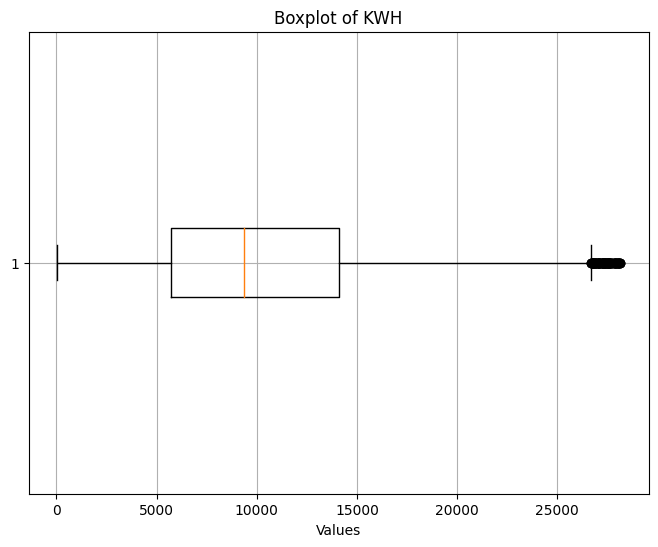

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data[TARGET], vert=False)
plt.title(f'Boxplot of KWH')
plt.xlabel('Values')
plt.grid(True)
plt.show()

In [ ]:
data.dtypes

Type of housing unit                                                                        int64
Heating degree days in 2009, base temperature 65F                                           int64
Cooling degree days in 2009, base temperature 65F                                           int64
Building America Climate Region (collapsed for public file)                                 int64
AIA Climate Zone, based on average temperatures from 1981 - 2010                            int64
                                                                                           ...   
Annual average ground water temperature (F) for 2009                                        int64
Dry bulb design temperature (F) expected to be exceeded 1% of the time                      int64
Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area     float64
Housing unit classified as urban or rural by Census                                       float64
International Energy

In [ ]:
data.replace(-2,np.nan,inplace=True)

In [ ]:
data

,Type of housing unit,"Heating degree days in 2009, base temperature 65F","Cooling degree days in 2009, base temperature 65F",Building America Climate Region (collapsed for public file),"AIA Climate Zone, based on average temperatures from 1981 - 2010","Housing unit is owned, rented, or occupied without payment of rent",Year housing unit was built,Number of bedrooms,Number of full bathrooms,Number of half bathrooms,...,"Total cost, in whole dollars, 2009","Total cost for water heating, in whole dollars, 2009","Cooling degree days in 2009, base temperature 80F",Weather & shielding factor for the housing unit,Annual value for latent heat infiltration from outside air into the housing unit,Annual average ground water temperature (F) for 2009,Dry bulb design temperature (F) expected to be exceeded 1% of the time,Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area,Housing unit classified as urban or rural by Census,International Energy Conservation Code (IECC) climate zone (collapsed for public file)
0,2,4742,1080,4,3,1,2004,4.0,1,2,...,1315,211,56,0.48,6,56,96,0.0,1.0,5.0
1,2,2662,199,5,4,2,1998,3.0,2,1,...,1293,287,26,0.61,0,64,73,0.0,1.0,4.0
3,2,6034,672,1,2,1,1985,3.0,2,1,...,1398,179,0,0.55,4,55,87,0.0,1.0,7.0
4,3,5388,702,1,3,1,1983,2.0,1,1,...,1558,237,0,0.61,4,50,90,0.0,1.0,7.0
5,2,8866,270,1,1,1,1920,3.0,1,0,...,1906,131,3,0.58,0,49,84,0.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,2,7671,332,1,1,1,1985,3.0,2,0,...,1541,253,39,0.59,0,48,84,0.0,1.0,9.0
12079,4,2085,2844,2,5,2,1980,NaN,1,0,...,543,54,393,0.50,0,56,101,0.0,1.0,3.0
12080,2,7935,472,1,1,1,1993,4.0,3,1,...,2093,204,22,0.58,1,46,89,0.0,1.0,9.0
12081,2,5834,770,1,2,1,1930,3.0,1,0,...,1023,108,0,0.54,1,53,93,0.0,1.0,8.0


In [ ]:
# Calculate the percentage of NaN entries in each column
nan_percentage = (data.isna().mean() * 100).to_dict()

sorted_nan_percentage = dict(sorted(nan_percentage.items(), key=lambda x: x[1], reverse=True))

print(sorted_nan_percentage)

{'Charging patterns for rechargeable electronic devices': 9.05275779376499, 'Outlet within 20 feet of vehicle parking': 9.009934909215485, 'High ceilings': 4.47927372387804, 'Microwave used for defrosting': 3.9825282631038026, 'Main space heating fuel': 3.759849263446386, 'Routine service or maintenance performed on main space heating equipment': 3.759849263446386, 'Secondary space heating equipment used': 3.759849263446386, 'Central warm-air furnace used for secondary space heating': 3.759849263446386, 'Built-in electric units used for secondary space heating': 3.759849263446386, 'Fireplace used for secondary space heating': 3.759849263446386, 'Number of rooms heated': 3.759849263446386, 'Temperature when no on is home during the day (winter)': 3.759849263446386, 'Temperature at night (winter)': 3.759849263446386, 'Number of bedrooms': 1.84138403562864, 'Size of most-used TV': 1.2675573826652964, 'Display type of most-used TV': 1.2675573826652964, 'Cable box or satellite box connected

In [ ]:
len(sorted_nan_percentage)

157

(array([135.,   8.,   1.,   0.,  11.,   0.,   0.,   0.,   0.,   2.]),
 array([0.        , 0.90527578, 1.81055156, 2.71582734, 3.62110312,
        4.5263789 , 5.43165468, 6.33693046, 7.24220624, 8.14748201,
        9.05275779]),
 <BarContainer object of 10 artists>)

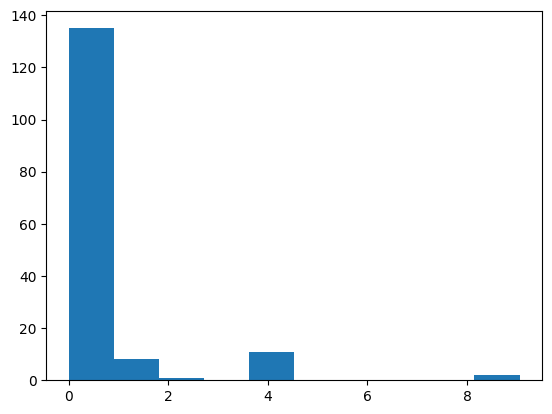

In [ ]:
nulls= sorted_nan_percentage.values()

plt.hist(nulls)

In [ ]:
highnulls= [list(sorted_nan_percentage.keys())[i] for i in range(len(list(nulls))) if list(nulls)[i]>3]
highnulls

['Charging patterns for rechargeable electronic devices',
 'Outlet within 20 feet of vehicle parking',
 'High ceilings',
 'Microwave used for defrosting',
 'Main space heating fuel',
 'Routine service or maintenance performed on main space heating equipment',
 'Secondary space heating equipment used',
 'Central warm-air furnace used for secondary space heating',
 'Built-in electric units used for secondary space heating',
 'Fireplace used for secondary space heating',
 'Number of rooms heated',
 'Temperature when no on is home during the day (winter)',
 'Temperature at night (winter)']

In [ ]:
data[highnulls]

,Charging patterns for rechargeable electronic devices,Outlet within 20 feet of vehicle parking,High ceilings,Microwave used for defrosting,Main space heating fuel,Routine service or maintenance performed on main space heating equipment,Secondary space heating equipment used,Central warm-air furnace used for secondary space heating,Built-in electric units used for secondary space heating,Fireplace used for secondary space heating,Number of rooms heated,Temperature when no on is home during the day (winter),Temperature at night (winter)
0,2.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,66.0,68.0
1,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,70.0,73.0
3,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,55.0,55.0
4,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,70.0,70.0
5,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,66.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,60.0,60.0
12079,2.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,50.0,90.0
12080,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,8.0,62.0,65.0
12081,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,62.0,64.0


In [ ]:
x=list(data.columns)
for i in x:
  if "year" in i.lower():
    print(i)



Year housing unit was built
Imputation flag for YEARMADE


In [ ]:
len(data["Year housing unit was built"].unique()), data["Year housing unit was built"].isna().sum()

(90, 0)

In [ ]:
label_encoder= LabelEncoder()

data["Year housing unit was built"]= label_encoder.fit_transform(data["Year housing unit was built"])

In [ ]:
data["Year housing unit was built"]

0        84
1        78
3        65
4        63
5         0
         ..
12078    65
12079    60
12080    73
12081    10
12082    28
Name: Year housing unit was built, Length: 11676, dtype: int64

all of these are categorical only

In [ ]:
categorical_nulls = [ i for i in list(sorted_nan_percentage.keys()) if len(data[i].unique())<100]
len(categorical_nulls)

130

In [ ]:
data[list(sorted_nan_percentage.keys())].isna().sum()

Charging patterns for rechargeable electronic devices                                     1057
Outlet within 20 feet of vehicle parking                                                  1052
High ceilings                                                                              523
Microwave used for defrosting                                                              465
Main space heating fuel                                                                    439
                                                                                          ... 
Annual average ground water temperature (F) for 2009                                         0
Dry bulb design temperature (F) expected to be exceeded 1% of the time                       0
Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area        0
Housing unit classified as urban or rural by Census                                          0
International Energy Conservation Code (IECC) clim

In [ ]:
for col in sorted_nan_percentage.keys():

  if col not in categorical_nulls:  #if numerical col
    data[col].fillna( data[col].mean(), inplace=True )

  else:
    data[col].fillna(data[col].median(), inplace=True )

In [ ]:
data[list(sorted_nan_percentage.keys())].isna().sum()

Charging patterns for rechargeable electronic devices                                     0
Outlet within 20 feet of vehicle parking                                                  0
High ceilings                                                                             0
Microwave used for defrosting                                                             0
Main space heating fuel                                                                   0
                                                                                         ..
Annual average ground water temperature (F) for 2009                                      0
Dry bulb design temperature (F) expected to be exceeded 1% of the time                    0
Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area     0
Housing unit classified as urban or rural by Census                                       0
International Energy Conservation Code (IECC) climate zone (collapsed for public

handled null vals

In [ ]:
y= data[TARGET]
data.drop(columns=TARGET,inplace=True)

data.shape

(11676, 156)

In [ ]:
scaler= StandardScaler()

for col in data.columns:
  data[col]  = scaler.fit_transform(data[col].values.reshape(-1, 1))

In [ ]:
data

,Type of housing unit,"Heating degree days in 2009, base temperature 65F","Cooling degree days in 2009, base temperature 65F",Building America Climate Region (collapsed for public file),"AIA Climate Zone, based on average temperatures from 1981 - 2010","Housing unit is owned, rented, or occupied without payment of rent",Year housing unit was built,Number of bedrooms,Number of full bathrooms,Number of half bathrooms,...,"Total cost, in whole dollars, 2009","Total cost for water heating, in whole dollars, 2009","Cooling degree days in 2009, base temperature 80F",Weather & shielding factor for the housing unit,Annual value for latent heat infiltration from outside air into the housing unit,Annual average ground water temperature (F) for 2009,Dry bulb design temperature (F) expected to be exceeded 1% of the time,Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area,Housing unit classified as urban or rural by Census,International Energy Conservation Code (IECC) climate zone (collapsed for public file)
0,-0.566385,0.251870,-0.283059,1.043638,-0.196363,-0.693041,1.337846,1.145525,-0.907126,3.402811,...,-0.626091,-0.334525,-0.308751,-0.235928,0.065456,-0.350067,0.930436,-0.38432,0.488571,0.151169
1,-0.566385,-0.647119,-1.067015,1.782468,0.587209,1.310908,1.095834,0.166521,0.502457,1.400835,...,-0.647496,0.084563,-0.424911,1.321956,-0.826162,0.575047,-2.810028,-0.38432,0.488571,-0.206346
3,-0.566385,0.810281,-0.646117,-1.172851,-0.979935,-0.693041,0.571475,0.166521,0.502457,1.400835,...,-0.545335,-0.510983,-0.525583,0.602932,-0.231750,-0.465706,-0.533224,-0.38432,0.488571,0.866199
4,0.263574,0.531076,-0.619422,-1.172851,-0.196363,-0.693041,0.490805,-0.812482,-0.907126,1.400835,...,-0.389662,-0.191152,-0.525583,1.321956,-0.231750,-1.043903,-0.045337,-0.38432,0.488571,0.866199
5,-0.566385,2.034290,-1.003836,-1.172851,-1.763507,-0.693041,-2.050318,0.166521,-0.907126,-0.601142,...,-0.051072,-0.775670,-0.513967,0.962444,-0.826162,-1.159542,-1.021110,-0.38432,0.488571,1.581228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,-0.566385,1.517803,-0.948666,-1.172851,-1.763507,-0.693041,0.571475,0.166521,0.502457,-0.601142,...,-0.406202,-0.102923,-0.374575,1.082281,-0.826162,-1.275181,-1.021110,-0.38432,0.488571,1.581228
12079,1.093533,-0.896503,1.286635,-0.434021,1.370781,1.310908,0.369799,0.166521,-0.907126,-0.601142,...,-1.377214,-1.200272,0.996112,0.003746,-0.826162,-0.350067,1.743580,-0.38432,0.488571,-0.563860
12080,-0.566385,1.631906,-0.824087,-1.172851,-1.763507,-0.693041,0.894158,1.145525,1.912039,1.400835,...,0.130871,-0.373125,-0.440399,0.962444,-0.677559,-1.506460,-0.207966,-0.38432,0.488571,1.581228
12081,-0.566385,0.723840,-0.558912,-1.172851,-0.979935,-0.693041,-1.646966,0.166521,-0.907126,-0.601142,...,-0.910194,-0.902499,-0.525583,0.483095,-0.677559,-0.696985,0.442549,-0.38432,0.488571,1.223714


In [ ]:
mutual_info= mutual_info_regression(data,y)
mutual_info= pd.Series(mutual_info)
mutual_info.index= data.columns
mutual_info.sort_values(ascending=False)

Total usage, in thousand BTU, 2009                                                                            1.299058
Total Electricity cost, in whole dollars, 2009                                                                0.942769
Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in kilowatt-hours, 2009    0.845353
Electricity cost for other purposes (all end-uses except SPH, COL, WTH, and RFG), in wholedollars, 2009       0.419209
Total usage for appliances, electronics, lighting, and miscellaneous uses, in thousand BTU, 2009              0.385025
                                                                                                                ...   
Imputation flag for NAPTFLRS                                                                                  0.000000
Imputation flag for PCTATTCL                                                                                  0.000000
Charging patterns for rechargeable electronic de

<Axes: >

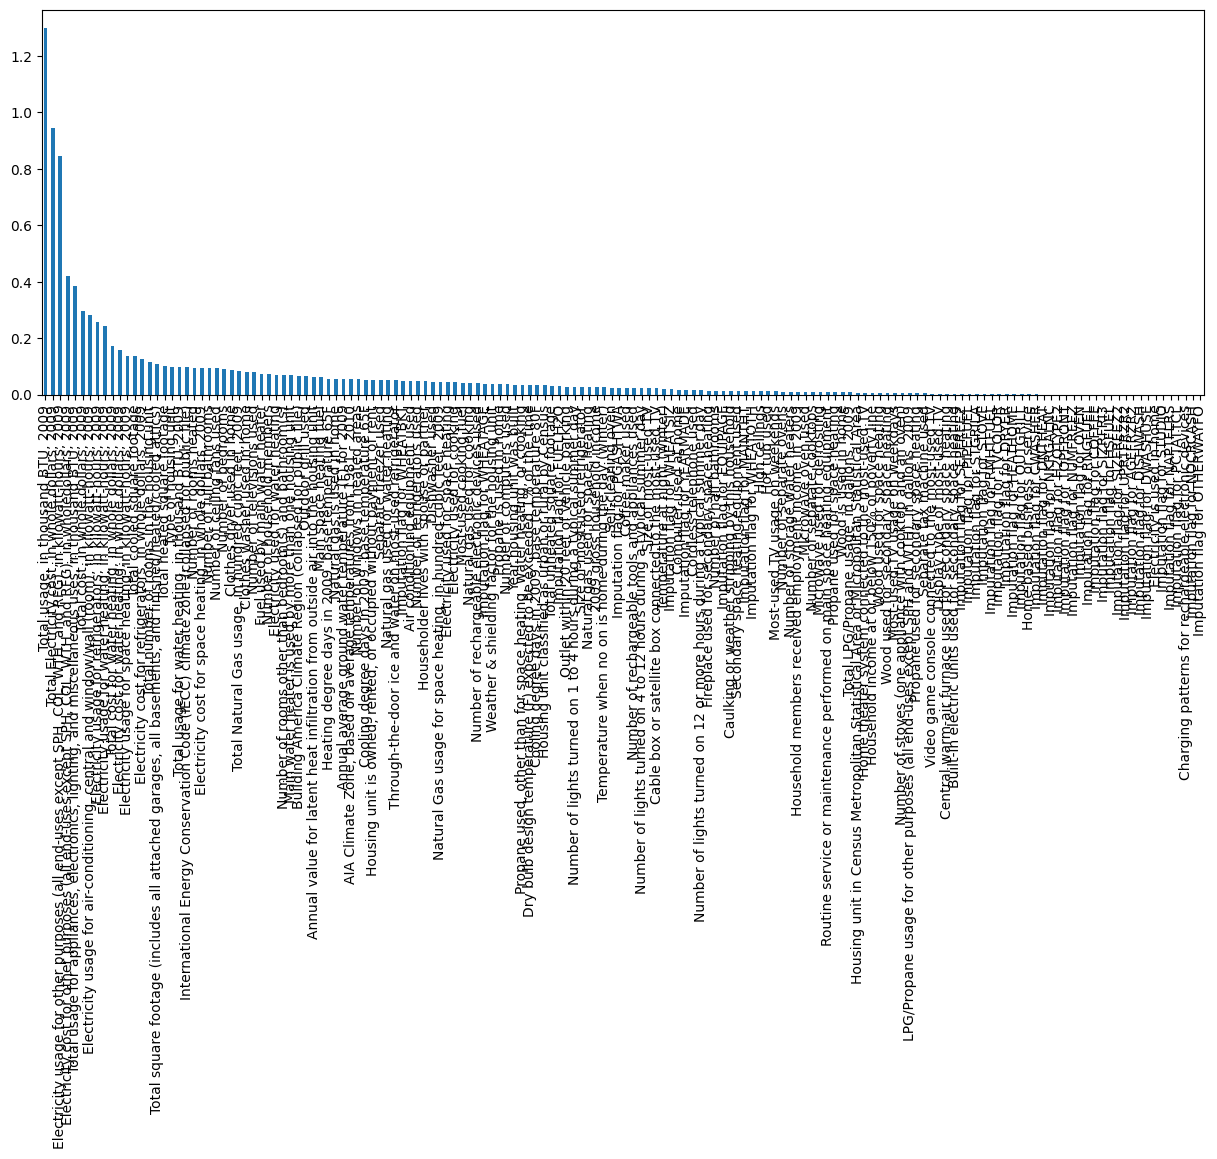

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
selected_top_columns= SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(data,y)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x7db65c42d870>)

In [ ]:
selected_top_columns= data.columns[selected_top_columns.get_support()]
selected_data= data[selected_top_columns]

In [ ]:
selected_data

,Type of housing unit,"Heating degree days in 2009, base temperature 65F","Cooling degree days in 2009, base temperature 65F",Building America Climate Region (collapsed for public file),"AIA Climate Zone, based on average temperatures from 1981 - 2010","Housing unit is owned, rented, or occupied without payment of rent",Year housing unit was built,Number of bedrooms,Number of full bathrooms,Number of rooms other than bedroom(s) and bathroom(s),...,"Total usage for appliances, electronics, lighting, and miscellaneous uses, in thousand BTU, 2009","Total cost, in whole dollars, 2009","Total cost for water heating, in whole dollars, 2009","Cooling degree days in 2009, base temperature 80F",Weather & shielding factor for the housing unit,Annual value for latent heat infiltration from outside air into the housing unit,Annual average ground water temperature (F) for 2009,Dry bulb design temperature (F) expected to be exceeded 1% of the time,Housing unit classified as urban or rural by Census,International Energy Conservation Code (IECC) climate zone (collapsed for public file)
0,-0.566385,0.251870,-0.283059,1.043638,-0.196363,-0.693041,1.337846,1.145525,-0.907126,1.379488,...,0.056848,-0.626091,-0.334525,-0.308751,-0.235928,0.065456,-0.350067,0.930436,0.488571,0.151169
1,-0.566385,-0.647119,-1.067015,1.782468,0.587209,1.310908,1.095834,0.166521,0.502457,-1.587612,...,0.249668,-0.647496,0.084563,-0.424911,1.321956,-0.826162,0.575047,-2.810028,0.488571,-0.206346
3,-0.566385,0.810281,-0.646117,-1.172851,-0.979935,-0.693041,0.571475,0.166521,0.502457,0.637713,...,-0.290405,-0.545335,-0.510983,-0.525583,0.602932,-0.231750,-0.465706,-0.533224,0.488571,0.866199
4,0.263574,0.531076,-0.619422,-1.172851,-0.196363,-0.693041,0.490805,-0.812482,-0.907126,-0.104062,...,-0.983797,-0.389662,-0.191152,-0.525583,1.321956,-0.231750,-1.043903,-0.045337,0.488571,0.866199
5,-0.566385,2.034290,-1.003836,-1.172851,-1.763507,-0.693041,-2.050318,0.166521,-0.907126,-0.104062,...,-0.200735,-0.051072,-0.775670,-0.513967,0.962444,-0.826162,-1.159542,-1.021110,0.488571,1.581228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,-0.566385,1.517803,-0.948666,-1.172851,-1.763507,-0.693041,0.571475,0.166521,0.502457,-0.104062,...,-0.471035,-0.406202,-0.102923,-0.374575,1.082281,-0.826162,-1.275181,-1.021110,0.488571,1.581228
12079,1.093533,-0.896503,1.286635,-0.434021,1.370781,1.310908,0.369799,0.166521,-0.907126,-1.587612,...,-1.297057,-1.377214,-1.200272,0.996112,0.003746,-0.826162,-0.350067,1.743580,0.488571,-0.563860
12080,-0.566385,1.631906,-0.824087,-1.172851,-1.763507,-0.693041,0.894158,1.145525,1.912039,0.637713,...,1.027807,0.130871,-0.373125,-0.440399,0.962444,-0.677559,-1.506460,-0.207966,0.488571,1.581228
12081,-0.566385,0.723840,-0.558912,-1.172851,-0.979935,-0.693041,-1.646966,0.166521,-0.907126,-0.845837,...,-0.728676,-0.910194,-0.902499,-0.525583,0.483095,-0.677559,-0.696985,0.442549,0.488571,1.223714


In [ ]:
layout

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8
...,...,...,...,...,...
935,WSF,Weather & shielding factor for the housing unit,936,Numeric,8
936,OA_LAT,Annual value for latent heat infiltration from...,937,Numeric,8
937,GWT,Annual average ground water temperature (F) fo...,938,Numeric,8
938,DesignDBT99,Dry bulb design temperature (F) expected to be...,939,Numeric,8


In [ ]:
layout.iloc[0,:]

Variable Name                                             DOEID
Variable Label            Unique identifier for each respondent
Variable Order in File                                        1
Variable Type                                         Character
Length                                                        5
Name: 0, dtype: object

In [ ]:
selected_columns = list(selected_data.columns)
abbreviations=[]
for i in range(layout.shape[0]):
  if layout.iloc[i,1] in selected_columns:
    abbreviations.append(layout.iloc[i,0])

print(len(abbreviations))
for i in abbreviations:
  print(i)

78
TYPEHUQ
HDD65
CDD65
Climate_Region_Pub
AIA_Zone
UR
KOWNRENT
YEARMADE
BEDROOMS
NCOMBATH
OTHROOMS
TOTROOMS
OUTLET
OUTGRILL
FUELFOOD
NUMFRIG
SIZRFRI1
ICE
SEPFREEZ
DISHWASH
CWASHER
DRYER
TVCOLOR
NUMPC
BATTOOLS
ELECDEV
FUELHEAT
HEATROOM
TEMPGONE
FUELH2O
WHEATOTH
ZFUELH2O
ZWHEATAGE
ZWHEATBKT
AIRCOND
NUMCFAN
LGT1
WINDOWS
USENG
USELP
ELWARM
ELWATER
ELFOOD
UGWARM
UGWATER
UGCOOK
LPOTHER
ZPGASHTWA
SPOUSE
NHSLDMEM
MONEYPY
TOTSQFT
TOTHSQFT
TOTUSQFT
TOTCSQFT
KWHSPH
KWHCOL
KWHWTH
KWHRFG
KWHOTH
DOLLAREL
DOLELSPH
DOLELWTH
DOLELRFG
DOLELOTH
CUFEETNG
CUFEETNGSPH
TOTALBTU
TOTALBTUWTH
TOTALBTUOTH
TOTALDOL
TOTALDOLWTH
IECC_Climate_Pub
CDD80
WSF
OA_LAT
GWT
DesignDBT1


In [ ]:
n_components=78
pca = PCA(n_components)  # Specify the number of components to retain

# Fit PCA to the standardized data
pca.fit(selected_data)

# Transform the data into principal components
principal_components = pca.transform(selected_data)



In [ ]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1,n_components+1)])

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the DataFrame with principal components
print("DataFrame with principal components:")
pc_df

Explained variance ratio: [0.1966353  0.14022923 0.07705636 0.04594529 0.03424483 0.03024688
 0.02523494 0.02352459 0.022893   0.02133457 0.01958775 0.01669286
 0.01637474 0.01509867 0.01470319 0.01458243 0.01270322 0.01244197
 0.01201983 0.01149298 0.01100214 0.01064298 0.01057324 0.01032411
 0.0098878  0.00966024 0.00874659 0.00850211 0.0081685  0.00799671
 0.00775133 0.00739008 0.00725832 0.00690591 0.00679695 0.00657562
 0.00650365 0.00608891 0.00603912 0.00582918 0.00557045 0.00507421
 0.00483949 0.00459432 0.00419352]
DataFrame with principal components:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,3.228600,4.261351,2.171432,-1.163422,-2.686258,-0.343228,-1.637357,0.879688,-0.489562,-0.749160,...,-0.506287,0.081237,-0.076520,0.005367,0.649819,0.276533,1.553163,0.355749,-1.722360,0.470374
1,0.408010,-3.089626,-1.962474,-0.406421,0.979725,-0.155366,-1.812407,-0.124508,-0.385411,0.965928,...,-0.257697,-0.740698,0.638698,0.110546,-0.491207,1.307148,0.575102,1.050738,0.832402,-0.310299
2,0.815800,-0.596036,1.846938,-1.751481,-0.674230,1.563435,1.261797,1.441907,0.051469,0.550760,...,0.438327,-0.373989,0.084464,-0.661918,0.477126,1.283606,0.133478,-0.965259,0.233323,-0.160168
3,-0.925148,-3.210221,1.031123,-2.639964,-0.589302,-0.553273,1.456236,-1.060028,0.887033,0.855131,...,-0.188211,-0.758347,-0.539000,-0.209892,0.398120,0.383807,0.400926,0.485661,-0.475132,0.143252
4,1.921354,-4.981259,1.367391,-1.485935,1.376733,-0.344449,0.663230,0.101342,-0.495476,-2.442353,...,-0.293312,1.303666,-0.504012,0.441721,1.075411,0.078459,-0.816906,-0.302346,0.233319,0.545810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11671,-0.012221,-1.546373,3.421381,-2.483416,-0.124588,1.555167,1.457326,0.089636,-0.767826,0.293406,...,-0.448182,-0.500513,-0.145366,-0.372302,-0.444749,1.109183,-0.544591,0.006169,0.322522,-0.023307
11672,-6.307797,-2.421195,-3.213140,-1.378184,1.265116,-0.386242,-1.249832,0.456917,1.095251,-0.761155,...,0.313271,-0.332395,0.095147,0.438347,-0.627758,-0.648590,-0.524561,0.666116,-0.683670,0.284059
11673,6.257007,-3.679378,0.359508,-0.433879,-1.079141,0.001122,-0.722185,1.384117,0.168413,-2.068256,...,-0.220038,0.258091,0.027349,0.218748,-0.666509,-0.147121,0.570057,-0.160391,0.281240,-0.137430
11674,-1.020600,-3.555605,0.420007,-2.218058,0.591486,2.193842,1.357143,1.808593,1.683295,0.722737,...,0.454639,1.165352,0.108754,0.809799,0.325082,0.026525,0.794403,-0.638514,-0.022579,0.126157


[0.1966353  0.33686452 0.41392088 0.45986617 0.494111   0.52435788
 0.54959282 0.57311742 0.59601041 0.61734498 0.63693273 0.65362558
 0.67000032 0.68509899 0.69980217 0.7143846  0.72708782 0.73952979
 0.75154962 0.7630426  0.77404474 0.78468772 0.79526096 0.80558507
 0.81547288 0.82513312 0.83387971 0.84238182 0.85055032 0.85854702
 0.86629835 0.87368843 0.88094675 0.88785267 0.89464961 0.90122523
 0.90772888 0.91381778 0.9198569  0.92568608 0.93125654 0.93633074
 0.94117023 0.94576455 0.94995807]


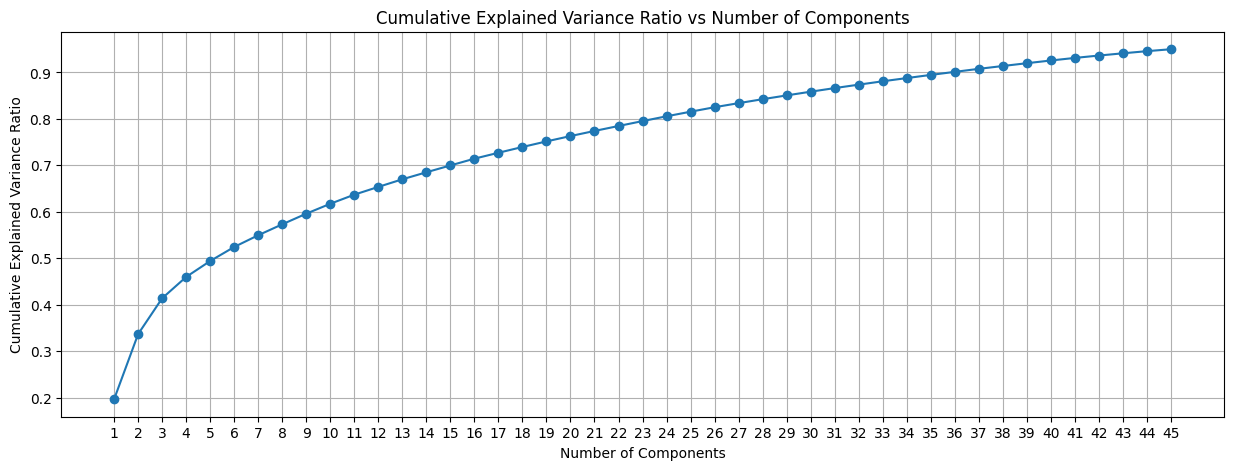

In [ ]:

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_ratio)
# Plot the cumulative explained variance ratio
plt.figure(figsize=(15, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()

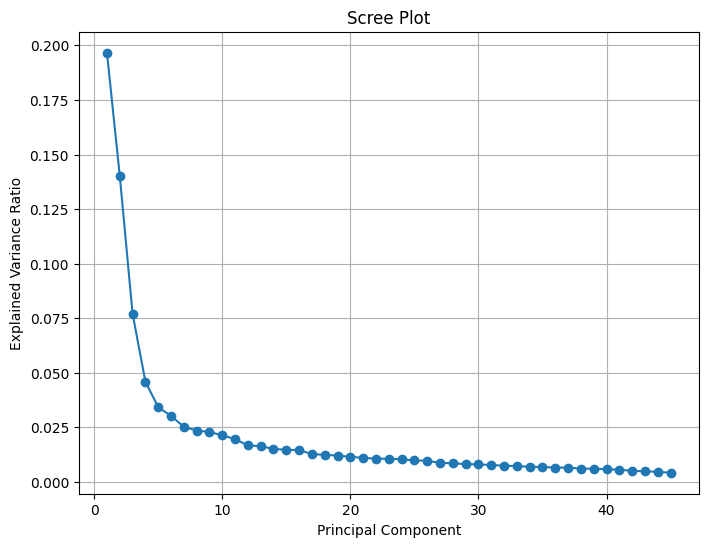

In [ ]:
# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

no sharp elbow, we'll take 45 dims since its able to explain more than 95%
 variance and has very little explained variance ratio after that

In [ ]:
n_components=45
pca = PCA(n_components)  # Specify the number of components to retain

# Fit PCA to the standardized data
pca.fit(selected_data)

# Transform the data into principal components
principal_components = pca.transform(selected_data)

# Create a DataFrame with the principal components
X = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1,n_components+1)])


In [ ]:
X.shape

(11676, 45)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#not using train test split so that we can get the same splits in each run

# Splitting the data into training and testing sets
train_size = int(0.8 * X.shape[0])
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Instantiate Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
linear_reg_pred = linear_reg_model.predict(X_test)



In [ ]:
from sklearn.metrics import mean_squared_error

lin_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
print("Root Mean Squared Error (RMSE):", lin_reg_rmse)


Root Mean Squared Error (RMSE): 1136.1724662559243


In [ ]:


# # Define parameter grid
# param_grid_xgb = {
#     'n_estimators': [250, 500, 750],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [5, 7,10]
# }

# xgb_model = xgb.XGBRegressor()

# # Perform grid search
# grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error')
# grid_search_xgb.fit(X_train, y_train)

# # Best parameters
# print("Best XGB Parameters:", grid_search_xgb.best_params_)





In [ ]:
## create XGB model with best params here: Best XGB Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 750}
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_model= xgb.XGBRegressor(n_estimators= 750, max_depth= 5, learning_rate= 0.05)
xgb_model.fit(X_train, y_train)

xgb_preds= xgb_model.predict(X_test)

In [ ]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print("Root Mean Squared Error (RMSE):", xgb_rmse)

Root Mean Squared Error (RMSE): 1252.7047367911402


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV

# # Define RandomForestRegressor
# rf = RandomForestRegressor()

# # Define parameter grid
# param_grid_rf = {
#     'n_estimators': [250, 500, 750],
#     'max_depth': [5, 7, 10]
# }

# # Perform random search
# random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=5, cv=3, scoring='neg_mean_squared_error')
# random_search_rf.fit(X_train, y_train)

# # Best parameters
# print("Best RF Parameters:", random_search_rf.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=750, max_depth=10, random_state=42)  # You can adjust parameters like n_estimators, max_depth, etc.

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_regressor.predict(X_test)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Root Mean Squared Error:", rf_rmse)

Root Mean Squared Error: 1987.653869897721


In [ ]:
import tensorflow as tf

# Define the architecture of the neural network
input_size = n_components
hidden_size1 = 1024
hidden_size2 = 256
hidden_size3= 64
output_size = 1

# Define the model using the Sequential API
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size1, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(hidden_size2, activation='relu'),
     tf.keras.layers.Dense(hidden_size3, activation='relu'),
    tf.keras.layers.Dense(output_size)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Predict using the trained model
nn_preds = nn_model.predict(X_test)


Epoch 1/10
234/234 [==============================] - 4s 12ms/step - loss: 44202484.0000 - val_loss: 2313570.5000
Epoch 2/10
234/234 [==============================] - 2s 7ms/step - loss: 2082859.6250 - val_loss: 1809069.0000
Epoch 3/10
234/234 [==============================] - 2s 7ms/step - loss: 1729566.1250 - val_loss: 1532458.6250
Epoch 4/10
234/234 [==============================] - 2s 7ms/step - loss: 1549099.8750 - val_loss: 1443129.7500
Epoch 5/10
234/234 [==============================] - 2s 7ms/step - loss: 1389400.7500 - val_loss: 1664217.2500
Epoch 6/10
234/234 [==============================] - 2s 8ms/step - loss: 1413042.3750 - val_loss: 1622126.3750
Epoch 7/10
234/234 [==============================] - 2s 9ms/step - loss: 1237609.1250 - val_loss: 1268958.3750
Epoch 8/10
234/234 [==============================] - 3s 12ms/step - loss: 1260799.1250 - val_loss: 1613651.6250
Epoch 9/10
234/234 [==============================] - 2s 7ms/step - loss: 1211292.6250 - val_loss: 11

In [ ]:
nn_rmse= np.sqrt(mean_squared_error(y_test, nn_preds))
nn_rmse

1056.3122337358088

In [ ]:
nn_preds.shape, y_test.shape

((2336, 1), (2336,))

In [ ]:
ensemble_predictions = (linear_reg_pred + xgb_preds + rf_pred + nn_preds.flatten()) / 4  # Flatten nn_preds to match shape

ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)

ensemble_rmse

1115.1867064436422

In [ ]:
# # Select a single row of data (e.g., the 100th row)
# single_row = X_test.iloc[100, :]

# # Reshape the data to a 2D array
# single_row_2d = single_row.values.reshape(1, -1)

# # Make predictions for the single row
# y_pred_single_row = linear_reg_model.predict(single_row_2d)

# print("Predicted value:", y_pred_single_row)

In [ ]:
# # Select a single row of data (e.g., the 100th row)
# single_row = X_test1.iloc[100, :]

# # Reshape the data to a 2D array
# single_row_2d = single_row.values.reshape(1, -1)

# # Make predictions for the single row
# y_pred_single_row = linear_reg_model_whole.predict(single_row_2d)

# print("Predicted value:", y_pred_single_row)

In [ ]:
# # Instantiate Random Forest classifier
# # Create Random Forest classifier with max_depth set to 5
# rf_classifier = RandomForestClassifier(max_depth=5)

# # Train the model
# rf_classifier.fit(X1, y)

# # Retrieve feature importance scores
# feature_importance_scores = rf_classifier.feature_importances_




In [ ]:
# feature_names = X1.columns

# # Combine feature names and importance scores into a pandas DataFrame

# feature_importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': feature_importance_scores})

# feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=True)


In [ ]:
# feature_importance_df

In [ ]:
# feature_importance_df["importance"].sum()

In [ ]:
# # Instantiate Random Forest classifier
# # Create Random Forest classifier with max_depth set to 5
# rf_classifier = RandomForestClassifier(max_depth=5)

# # Train the model
# rf_classifier.fit(X2, y)

# # Retrieve feature importance scores
# feature_importance_scores = rf_classifier.feature_importances_


# feature_names = X2.columns

# # Combine feature names and importance scores into a pandas DataFrame

# feature_importance_df2 = pd.DataFrame({'feature_name': feature_names, 'importance': feature_importance_scores})

# feature_importance_df2 = feature_importance_df2.sort_values(by='importance', ascending=True)


In [ ]:
# feature_importance_df2